In [1]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [92]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import tree
from sklearn import neighbors
data = pd.read_csv("chessData.csv")
#read in the chess Data that I had saved locally!

In [3]:
winnerArray = data['winner'].to_numpy()

In [4]:
whiteRating = data['white_rating'].to_numpy()
blackRating = data['black_rating'].to_numpy()
numberofturns = data['turns'].to_numpy()

In [5]:
print(winnerArray.size)
print(whiteRating.size)
print(blackRating.size)
print(numberofturns.size)

20058
20058
20058
20058


In [6]:
listRatingsResult = []
print(winnerArray)
for i in range(winnerArray.size):
    listRatingsResult.append([whiteRating[i], blackRating[i], winnerArray[i], numberofturns[i]])
df = pd.DataFrame(listRatingsResult)
                

['white' 'black' 'white' ... 'white' 'white' 'black']


In [7]:
df.columns=['White Rating', 'Black Rating', 'Result', 'Turns']


In [8]:
#let white or black winner correspond to a 1 and a tie correspond to a 0
ratingsDiff=[]
resultArr=[]
for i in range(df['White Rating'].size):
    diff = df['White Rating'][i]-df['Black Rating'][i]
    if diff < 0:
        diff = diff * -1
    ratingsDiff.append(diff)
    if df['Result'][i] == 'white':
        resultArr.append(1)
    elif df['Result'][i] == 'black':
        resultArr.append(1)
    else:
        resultArr.append(0)

In [9]:
DifferenceAndResult = pd.DataFrame(list(zip(ratingsDiff, resultArr)), columns=['Abs Val of Diff in Ratings', 'Result of Game'])

In [10]:
# Difference and Result dataframe consists of two series in which the first is the abs val of the diff in ratings and the second is the result of the game. A 1 indicates that there was an outright winner. A 0 indicates a draw. 

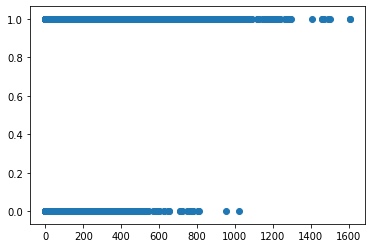

In [11]:
scatter(DifferenceAndResult['Abs Val of Diff in Ratings'], DifferenceAndResult['Result of Game'])

In [12]:
# above plot: difference in ratings (abs val) on x-axis and y-axis is binary in that a 0 is draw and a 1 is a winner

In [13]:
#let's try to predict what the victory status will be based on number of turns and abs val of difference in ratings
# let 0 be a draw, 1 a checkmate, 2 resign, and 3 out of time
# we have already calculate the abs val of ratings difference 
data['victory_status']

0        outoftime
1           resign
2             mate
3             mate
4             mate
5             draw
6           resign
7           resign
8           resign
9             mate
10            mate
11          resign
12          resign
13          resign
14            mate
15          resign
16          resign
17            mate
18          resign
19          resign
20          resign
21          resign
22          resign
23          resign
24          resign
25            mate
26          resign
27            mate
28          resign
29            mate
           ...    
20028         mate
20029       resign
20030       resign
20031         mate
20032         mate
20033       resign
20034         draw
20035       resign
20036         mate
20037         mate
20038       resign
20039       resign
20040       resign
20041         mate
20042       resign
20043       resign
20044         mate
20045       resign
20046         mate
20047         mate
20048       resign
20049       

In [14]:
vicStat = []
for i in range(data['victory_status'].size):
    if data['victory_status'][i] == "draw":
        vicStat.append(0)
    elif data['victory_status'][i] == "mate":
        vicStat.append(1)
    elif data['victory_status'][i] == "resign":
        vicStat.append(2)
    else:
        vicStat.append(3)

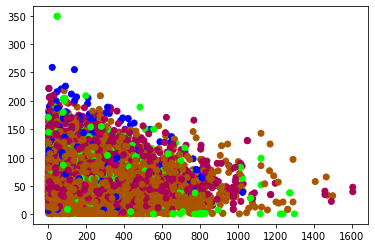

In [15]:
plt.scatter(ratingsDiff, data['turns'], c=vicStat,cmap=cm.brg) # plots ratings diff vs number of turns and points are colored by game status

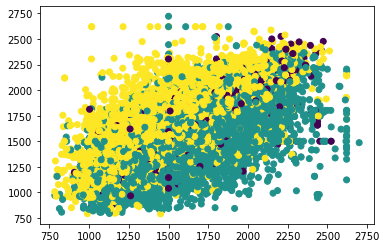

In [16]:
#tie = 0; white win = 1; black win = 2
winnerArray = []
for i in range(data['white_rating'].size):
    if data['winner'][i] == 'draw':
        winnerArray.append(0)
    elif data['winner'][i] == 'white':
        winnerArray.append(1)
    else:
        winnerArray.append(2)
plt.scatter(data['white_rating'], data['black_rating'], c=winnerArray)
    # 2d scatter plot of ratings between players colored by who won

In [17]:
data

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
5,MsoDV9wj,False,1.504240e+12,1.504240e+12,5,draw,draw,10+0,trelynn17,1250,franklin14532,1002,e4 c5 Nf3 Qa5 a3,B27,Sicilian Defense: Mongoose Variation,4
6,qwU9rasv,True,1.504230e+12,1.504230e+12,33,resign,white,10+0,capa_jr,1520,daniel_likes_chess,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10
7,RVN0N3VK,False,1.503680e+12,1.503680e+12,9,resign,black,15+30,daniel_likes_chess,1413,soultego,2108,e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4,B00,Nimzowitsch Defense: Kennedy Variation | Link...,5
8,dwF3DJHO,True,1.503510e+12,1.503510e+12,66,resign,black,15+0,ehabfanri,1439,daniel_likes_chess,1392,e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...,C50,Italian Game: Schilling-Kostic Gambit,6
9,afoMwnLg,True,1.503440e+12,1.503440e+12,119,mate,white,10+0,daniel_likes_chess,1381,mirco25,1209,e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Na6 d4 Qf5 Bxa6 b...,B01,Scandinavian Defense: Mieses-Kotroc Variation,4


In [18]:
moves=data['moves']

In [19]:
WhiteMoves = []
BlackMoves = []
wm = []
bm = []
for i in range(moves.size):
    string = moves[i]
    listMoves = string.split()
    del wm[:]
    del bm[:]
    for i in range(len(listMoves)):
        if i % 2 == 0:
            wm.append(listMoves[i])
        else:
            bm.append(listMoves[i])
    WhiteMoves.append(wm[:])
    BlackMoves.append(bm[:])
WhiteMoves
MovesDataFrame = pd.DataFrame(list(zip(WhiteMoves, BlackMoves)), columns=['White Moves', 'Black Moves'])

In [20]:
#The MovesDataFrame is a pandas dataframe in which each row correspond to the moves in that specific game with each column
# representing the moves of the player with white pieces and the moves of the players with black pieces

In [21]:
riskyMove = []
for i in range(MovesDataFrame['White Moves'].size):
    whitemoves = MovesDataFrame['White Moves'][i]
    blackmoves = MovesDataFrame['Black Moves'][i]
    it = 0
    found = 0
    white = 0
    black = 0
    while (it < len(whitemoves)) and (found==0):
           if whitemoves[it][0].isupper() == 1:
               found = 1
               white = 1
               break
           elif it < len(blackmoves):
               if blackmoves[it][0].isupper()==1:
                   found = 1
                   black = 1
                   break
           else:
               break
           it = it + 1
    if found == 0:
           riskyMove.append(-1)
    elif black == 1:
           riskyMove.append(2*(it+1))
    else:
           riskyMove.append((2*(it+1))-1)
    
riskyMove

[9,
 2,
 5,
 3,
 3,
 3,
 5,
 2,
 3,
 4,
 5,
 8,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 2,
 5,
 3,
 3,
 3,
 7,
 4,
 5,
 3,
 3,
 7,
 3,
 4,
 5,
 2,
 3,
 3,
 3,
 3,
 5,
 3,
 5,
 3,
 -1,
 3,
 3,
 4,
 4,
 5,
 4,
 5,
 1,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 1,
 2,
 3,
 3,
 3,
 3,
 2,
 8,
 3,
 7,
 3,
 2,
 3,
 3,
 7,
 3,
 2,
 2,
 6,
 3,
 3,
 5,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 4,
 4,
 5,
 3,
 8,
 3,
 2,
 3,
 5,
 5,
 6,
 8,
 4,
 6,
 2,
 5,
 3,
 3,
 3,
 3,
 3,
 2,
 1,
 3,
 4,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 2,
 2,
 3,
 2,
 6,
 6,
 3,
 6,
 6,
 2,
 3,
 2,
 4,
 3,
 2,
 2,
 2,
 2,
 3,
 7,
 2,
 2,
 2,
 5,
 4,
 1,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 5,
 3,
 3,
 2,
 3,
 3,
 3,
 5,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 6,
 4,
 4,
 3,
 3,
 4,
 3,
 3,
 4,
 4,
 3,
 4,
 5,
 3,
 3,
 3,
 3,
 5,
 3,
 5,
 3,
 3,
 6,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 6,
 3,
 3,
 4,
 3,
 3,
 3,
 8,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 4,
 3,
 3,
 6,
 3,
 3,
 3,
 3,
 5,
 3,
 3,
 7,
 1,
 3,
 3,
 3,
 3,
 3,

In [22]:
#riskyMove is an array that contains the ith move such that the ith move is the first in which a "risky"
# piece is moved. Let the ith number in the array be x. Then, for the ith game, the first risky piece that is moved occurs 
# during move x. A risky piece any of the pieces other than the pawns. 

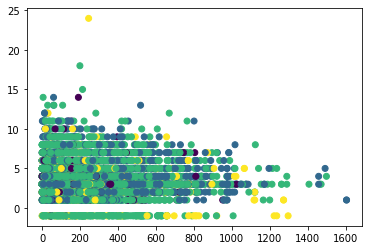

In [23]:
plt.scatter(ratingsDiff, riskyMove, c=vicStat)

In [24]:
# The above plot has the absolute value of the difference in player ratings on the x axis. The y axis correspond to the number of the first move
# in which a piece other than a pawn is moved. The points are colored by the vicStat array which is representative of either resign,outoftime, checkmate, draw


In [25]:
#Now we can slightly modify risky move to be the first move in which the user moves a rook, king, or queen

In [26]:
MovesDataFrame['White Moves']

0                      [d4, c4, cxd5, dxe6, Nf3, Nc3, Bf4]
1                  [d4, e4, f4, dxe5, fxe5, Qd4, Qe5+, c4]
2        [e4, d3, Be3, Be2, Nd2, a4, axb5, bxc6, Nc4, c...
3        [d4, Nf3, Nc3, Bf4, e3, Be2, O-O, Nb5, Rc1, Ra...
4        [e4, Nf3, d4, d5, a3, Nc3, b4, Bg5, b5, Bxf6, ...
5                                            [e4, Nf3, a3]
6        [d4, e4, Nc3, f3, Nxf3, Bb5, Bd3, O-O, Be2, Qx...
7                                     [e4, d4, d5, c3, b4]
8        [e4, Bc4, Nf3, d3, Qxf3, h3, a3, Be3, Qxe3, Qf...
9        [e4, exd5, Nc3, Be2, d4, Bxa6, Nf3, Be3, Ng5, ...
10       [e3, d4, Bd3, Nf3, Nc3, Bd2, Qe2, dxc5, O-O, R...
11       [e4, d4, e5, c3, Nf3, Be3, Nbd2, cxd4, Rb1, Qb...
12       [e4, Nf3, exd5, Qe2+, Nc3, d4, g4, Bg2, O-O, h...
13       [e4, Qh5, Qe5, d4, Qb5+, Qxb7, Qb3, Qe3, f3, B...
14       [e4, Nf3, Bc4, Nc3, O-O, d3, Bg5, Nd5, Nxf6+, ...
15       [e4, Nf3, Bc4, Ng5, O-O, Nxe4, Re1, g3, Nec3, ...
16       [e4, Nf3, Bc4, Nc3, O-O, Ne1, d3, Qf3, Qg3, Bh.

In [27]:
riskyMove = []
for i in range(MovesDataFrame['White Moves'].size):
    whitemoves = MovesDataFrame['White Moves'][i]
    blackmoves = MovesDataFrame['Black Moves'][i]
    it = 0
    found = 0
    white = 0
    black = 0
    while (it < len(whitemoves)) and (found==0):
           if whitemoves[it][0] == 'Q' or whitemoves[it][0] == 'K' or whitemoves[it][0] == 'R':
               found = 1
               white = 1
               break
           elif it < len(blackmoves):
               if blackmoves[it][0] == 'Q' or blackmoves[it][0] == 'K' or blackmoves[it][0] == 'R':
                   found = 1
                   black = 1
                   break
           else:
               break
           it = it + 1
    if found == 0:
           riskyMove.append(0)
    elif black == 1:
           riskyMove.append(1)
    else:
           riskyMove.append(-1)
    
riskyMove

[0,
 -1,
 1,
 1,
 1,
 1,
 -1,
 0,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 0,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 0,
 0,
 -1,
 1,
 1,
 0,
 -1,
 -1,
 1,
 0,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 0,
 -1,
 1,
 1,
 -1,
 0,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 0,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 0,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1

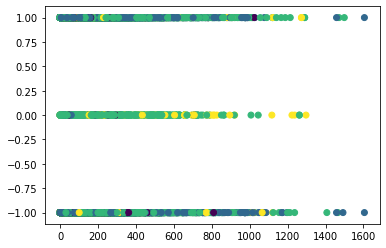

In [28]:
plt.scatter(ratingsDiff, riskyMove, c=vicStat)

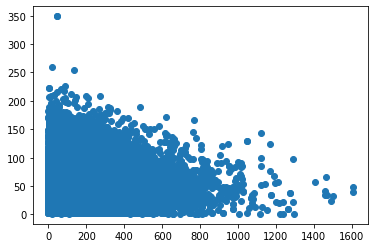

In [29]:
#check number of moves required for victory based on discrepancy in level
#we are expecting an inverse linear line
df
turncount = array(df['Turns'])
scatter(ratingsDiff, df['Turns'])


    

In [136]:
#This graph demonstrates that as the level discrepancy increases, the average number of turns necessary to complete
#a game decreases.

avgperratingdiff = [0] * 1650
countratingdiff = [0] * 1650
print(turncount)
for i, rating in enumerate(ratingsDiff):
    if (turncount[i] < 10):
        continue
    countratingdiff[rating] += 1
    avgperratingdiff[rating] += turncount[i]


for j in range(len(avgperratingdiff)):
    if (countratingdiff[j]) == 0:
        continue
    avgperratingdiff[j] = avgperratingdiff[j] / countratingdiff[j]

[ 13  16  61 ...  35 109  78]


1650


Text(0, 0.5, 'Average number of moves Played')

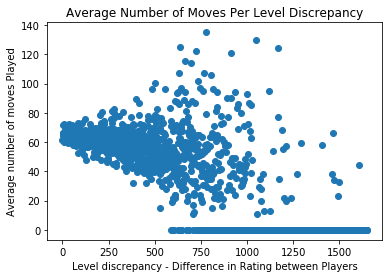

In [140]:
#print(len(ratingsDiff))
x = [i for i in range(0, 1650)]
print(len(x))
#print(len(avgperratingdiff))

scatter(x, avgperratingdiff)

plt.title("Average Number of Moves Per Level Discrepancy")
plt.xlabel("Level discrepancy - Difference in Rating between Players")
plt.ylabel("Average number of moves Played")

In [32]:
#We see a clear decay in the number of moves necessary to end a game as the level discrepancy increases. 

In [33]:
data


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
5,MsoDV9wj,False,1.504240e+12,1.504240e+12,5,draw,draw,10+0,trelynn17,1250,franklin14532,1002,e4 c5 Nf3 Qa5 a3,B27,Sicilian Defense: Mongoose Variation,4
6,qwU9rasv,True,1.504230e+12,1.504230e+12,33,resign,white,10+0,capa_jr,1520,daniel_likes_chess,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10
7,RVN0N3VK,False,1.503680e+12,1.503680e+12,9,resign,black,15+30,daniel_likes_chess,1413,soultego,2108,e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4,B00,Nimzowitsch Defense: Kennedy Variation | Link...,5
8,dwF3DJHO,True,1.503510e+12,1.503510e+12,66,resign,black,15+0,ehabfanri,1439,daniel_likes_chess,1392,e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...,C50,Italian Game: Schilling-Kostic Gambit,6
9,afoMwnLg,True,1.503440e+12,1.503440e+12,119,mate,white,10+0,daniel_likes_chess,1381,mirco25,1209,e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Na6 d4 Qf5 Bxa6 b...,B01,Scandinavian Defense: Mieses-Kotroc Variation,4


In [34]:
GamesEndingInResign=data[data['victory_status'] == "resign"]

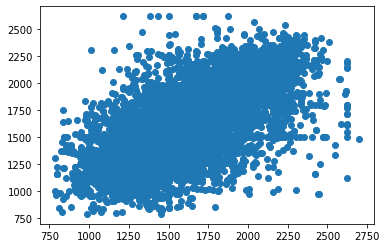

In [35]:
plt.scatter(GamesEndingInResign['white_rating'],GamesEndingInResign['black_rating'])

In [36]:
data['winner']

0        white
1        black
2        white
3        white
4        white
5         draw
6        white
7        black
8        black
9        white
10       white
11       black
12       black
13       black
14       white
15       black
16       black
17       black
18       black
19       white
20       black
21       white
22       white
23       white
24       black
25       white
26       white
27       black
28       black
29       black
         ...  
20028    white
20029    black
20030    black
20031    black
20032    white
20033    black
20034     draw
20035    white
20036    white
20037    black
20038    black
20039    white
20040    black
20041    black
20042    white
20043    white
20044    white
20045    white
20046    black
20047    white
20048    white
20049    white
20050    white
20051    black
20052    white
20053    white
20054    black
20055    white
20056    white
20057    black
Name: winner, Length: 20058, dtype: object

In [37]:
firstRiskTakerVersusWhoWon = []
for i in range(len(riskyMove)):
    if riskyMove[i] < 0:
        continue
    elif riskyMove[i] % 2 != 0:
        #white piece
        if (data['winner'][i]=='white'):
            firstRiskTakerVersusWhoWon.append(1)
        else:
            firstRiskTakerVersusWhoWon.append(0)
    else:
        #black piece
        if (data['winner'][i]=='black'):
            firstRiskTakerVersusWhoWon.append(1)
        else:
            firstRiskTakerVersusWhoWon.append(0)
firstRiskTakerVersusWhoWon[:]

[0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,


In [38]:
correctPredict = sum(firstRiskTakerVersusWhoWon[:])

In [39]:
length = len(firstRiskTakerVersusWhoWon[:])

In [40]:
float(correctPredict)/float(length)

0.4909523317133699

In [41]:
# The person who moved a non-pawn piece first is no more likely to win than the other player

In [42]:
firstCaptureVersusWhoWon = []


In [43]:
for i in range(MovesDataFrame['White Moves'].size):
    it = 0
    done = 0
    whitemoves = MovesDataFrame['White Moves'][i]
    blackmoves = MovesDataFrame['Black Moves'][i]
    while (it < len(whitemoves)) and (done==0):
        if (whitemoves[it].find("x")!=1):
            done = 1
            break
        if (it < len(blackmoves)):
            if (blackmoves[it].find("x")!=-1):
                done = 2
                break
        it+=1
    if done == 1:
    #white piece captures another piece first
        if (data['winner'][i]=='white'):
            firstCaptureVersusWhoWon.append(1)
        else:
            firstCaptureVersusWhoWon.append(0)
    else:
        #black piece captures another piece first
        if (data['winner'][i]=='black'):
            firstCaptureVersusWhoWon.append(1)
        else:
            firstCaptureVersusWhoWon.append(0)
print(float(sum(firstCaptureVersusWhoWon))/float(len(firstCaptureVersusWhoWon)))

0.49860404826004584


In [44]:
# player that captures another piece first is no more likely than the other player to win 

In [45]:
#let's do an analysis now of probability player who plays a risky piece first does not LOSE


In [46]:
del firstRiskTakerVersusWhoWon[:]
for i in range(len(riskyMove)):
    if riskyMove[i] < 0:
        continue
    elif riskyMove[i] % 2 != 0:
        #white piece
        if (data['winner'][i]=='black'):
            firstRiskTakerVersusWhoWon.append(0)
        else:
            firstRiskTakerVersusWhoWon.append(1)
    else:
        #black piece
        if (data['winner'][i]=='white'):
            firstRiskTakerVersusWhoWon.append(0)
        else:
            firstRiskTakerVersusWhoWon.append(1)
float(sum(firstRiskTakerVersusWhoWon[:]))/float(len(firstRiskTakerVersusWhoWon))

0.5373797952641919

In [47]:
#let's do another analusis of probability that a player who makes the fist capture does not Lose

In [48]:
del firstCaptureVersusWhoWon[:]
for i in range(MovesDataFrame['White Moves'].size):
    it = 0
    done = 0
    whitemoves = MovesDataFrame['White Moves'][i]
    blackmoves = MovesDataFrame['Black Moves'][i]
    while (it < len(whitemoves)) and (done==0):
        if (whitemoves[it].find("x")!=1):
            done = 1
            break
        if (it < len(blackmoves)):
            if (blackmoves[it].find("x")!=-1):
                done = 2
                break
        it+=1
    if done == 1:
    #white piece captures another piece first
        if (data['winner'][i]=='black'):
            firstCaptureVersusWhoWon.append(0)
        else:
            firstCaptureVersusWhoWon.append(1)
    else:
        #black piece captures another piece first
        if (data['winner'][i]=='white'):
            firstCaptureVersusWhoWon.append(0)
        else:
            firstCaptureVersusWhoWon.append(1)
print(float(sum(firstCaptureVersusWhoWon))/float(len(firstCaptureVersusWhoWon)))

0.5459666965799183


In [49]:
# about a 55% chance player who makes first capture does not lose 

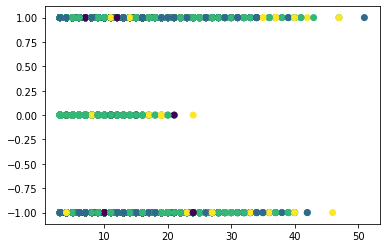

In [50]:
#plot number of moves until a non-pawn piece is played on y axis
# plot the turns it takes until first capture on x axis
# color points w.r.t the victory status of the game
movesUntilFirstCapture = []
for i in range(MovesDataFrame['White Moves'].size):
    whitemoves = MovesDataFrame['White Moves'][i]
    blackmoves = MovesDataFrame['Black Moves'][i]
    it = 0
    moveNum = 1
    while (it < len(whitemoves)):
        if (whitemoves[it].find("x")!=-1):
            break
        moveNum+=1
        if (it < len(blackmoves)):
            if (blackmoves[it].find("x")!=-1):
                break
        moveNum+=1
        it+=1
    movesUntilFirstCapture.append(moveNum)
plt.scatter(movesUntilFirstCapture, riskyMove, c=vicStat)

In [51]:
#Let's try and use a classifier tool now to somehow classify our data. In order to create our classification
#model, we can try a few different variables. 
#We will try and use kNN for this experiment with 2 variables - 
    #Who captured first
    #who moved both a knight and a bishop first

MovesDataFrame['White Moves']

0                      [d4, c4, cxd5, dxe6, Nf3, Nc3, Bf4]
1                  [d4, e4, f4, dxe5, fxe5, Qd4, Qe5+, c4]
2        [e4, d3, Be3, Be2, Nd2, a4, axb5, bxc6, Nc4, c...
3        [d4, Nf3, Nc3, Bf4, e3, Be2, O-O, Nb5, Rc1, Ra...
4        [e4, Nf3, d4, d5, a3, Nc3, b4, Bg5, b5, Bxf6, ...
5                                            [e4, Nf3, a3]
6        [d4, e4, Nc3, f3, Nxf3, Bb5, Bd3, O-O, Be2, Qx...
7                                     [e4, d4, d5, c3, b4]
8        [e4, Bc4, Nf3, d3, Qxf3, h3, a3, Be3, Qxe3, Qf...
9        [e4, exd5, Nc3, Be2, d4, Bxa6, Nf3, Be3, Ng5, ...
10       [e3, d4, Bd3, Nf3, Nc3, Bd2, Qe2, dxc5, O-O, R...
11       [e4, d4, e5, c3, Nf3, Be3, Nbd2, cxd4, Rb1, Qb...
12       [e4, Nf3, exd5, Qe2+, Nc3, d4, g4, Bg2, O-O, h...
13       [e4, Qh5, Qe5, d4, Qb5+, Qxb7, Qb3, Qe3, f3, B...
14       [e4, Nf3, Bc4, Nc3, O-O, d3, Bg5, Nd5, Nxf6+, ...
15       [e4, Nf3, Bc4, Ng5, O-O, Nxe4, Re1, g3, Nec3, ...
16       [e4, Nf3, Bc4, Nc3, O-O, Ne1, d3, Qf3, Qg3, Bh.

In [96]:

developedfirst = []
for i in range(MovesDataFrame['White Moves'].size):
    whitemovedknight = False
    whitemovedbishop = False
    blackmovedknight = False
    blackmovedbishop = False
    whitemoves = MovesDataFrame['White Moves'][i]
    blackmoves = MovesDataFrame['Black Moves'][i]
    it = 0
    moveNum = 1
    while (it < len(whitemoves)):
        if (whitemoves[it].find("N")!= -1):
            whitemovedknight = True
            
        elif (whitemoves[it].find("B") != -1):    
            whitemovedbishop = True
        if (whitemovedknight and whitemovedbishop):
            developedfirst.append(moveNum)
            #developedfirst.append(1)
            break
        if (it < len(blackmoves)):
            if (blackmoves[it].find("N")!=-1):
                blackmovedknight = True 
            elif (blackmoves[it].find("B") != -1):
                blackmovedbishop = True
            if (blackmovedknight and blackmovedbishop):
                developedfirst.append(-moveNum)
                #developedfirst.append(-1)
                break
        else:
            developedfirst.append(0)
            break
        it+=1
        moveNum += 1
    if (it == len(whitemoves)):
        developedfirst.append(0)

firstcapture = [] #if white captures first in game, mark as 1. If black captures first, mark as -1.
#If no captures made in the entire game, mark as 0.
for i in range(MovesDataFrame['White Moves'].size):
    whitemoves = MovesDataFrame['White Moves'][i]
    blackmoves = MovesDataFrame['Black Moves'][i]
    it = 0
    moveNum = 1
    while (it < len(whitemoves)):
        if (whitemoves[it].find("x")!=-1):
            #firstcapture.append(1)
            firstcapture.append(moveNum)
            break;
        moveNum+=1
        if (it < len(blackmoves)):
            if (blackmoves[it].find("x")!=-1):
                #firstcapture.append(-1)
                firstcapture.append(-moveNum)
                break;
        else:
            firstcapture.append(0)
            break;
        moveNum+=1
        it+=1
    if (it == len(whitemoves)):
        firstcapture.append(0)
print(MovesDataFrame['White Moves'].size)
#firstcapture = np.array(firstcapture)
#developedfirst = np.array(developedfirst)

20058


In [97]:
h = 0.1
#Create mesh grid as done in professor's lecture.
x_min, x_max = min(firstcapture) - 1, max(firstcapture) + 1
y_min, y_max = min(developedfirst) - 1, max(developedfirst) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]


print(len(firstcapture))
print(len(developedfirst))
print(len(firstcapture[:5]))
#fc = np.array(firstcapture)
#df = np.array(developedfirst)

20058
20058
5


[[  5   7]
 [  7  -8]
 [ 13   5]
 [-18  -3]
 [ 19  -6]
 [  0   0]
 [ -4   6]
 [  0   0]
 [ -8   3]
 [  3   4]
 [ 15   4]
 [-12   6]
 [  5  -5]
 [ 11  -5]
 [ 17   3]
 [-10   3]
 [ 21   3]
 [ 17   3]
 [ -8   3]
 [  9   4]]


AttributeError: 'QuadMesh' object has no property 'c'

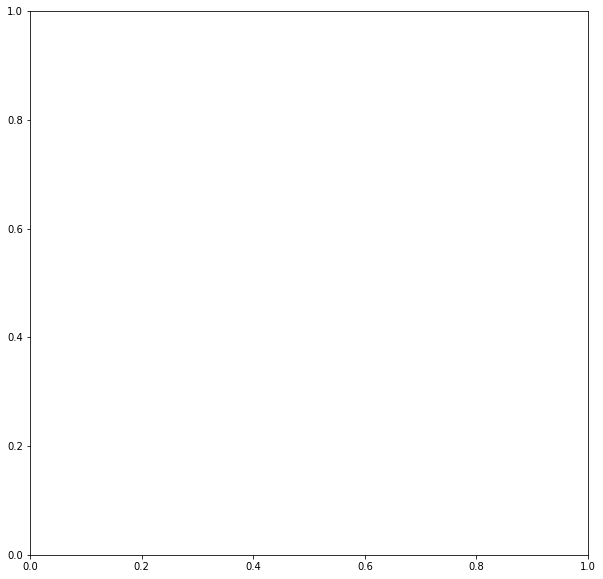

In [109]:
from sklearn.cluster import KMeans

combined = [firstcapture, developedfirst]
combined = np.array(combined)
cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])
cmap_bold = ListedColormap(['#CC0000', '#00AA00', '#0000CC'])
winner = [0] * 20058
for i, color in enumerate(data['winner']):
    if (color == 'white'):
        winner[i] = 1
    elif (color == 'black'):
        winner[i] = -1
    else:
        winner[i] = 0

combined = combined.transpose()
winner = np.array(winner).transpose()
print(combined[0:20, :])


clf2 = neighbors.KNeighborsClassifier(5, weights='uniform')
clf2.fit(combined[:,0:2], winner)
Z = clf2.predict(grid)
Z = Z.reshape(xx.shape) 
plt.figure(figsize=(10,10))
plt.pcolormesh(xx, yy, Z, c = winner, cmap=cmap_light)
plt.scatter(combined[:, 0], combined[:,1], c = winner, cmap=cmap_bold)
plt.title('5-NN')
plt.show()
#print('kNN performance score' + str(clf2.score(X[:, 0:2], X[:,2])))


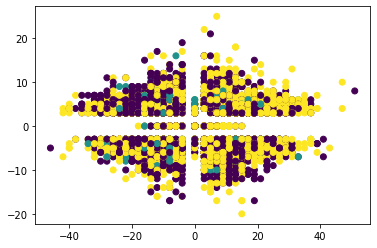

In [99]:
plt.scatter(combined[:, 0], combined[:,1], c = winner)

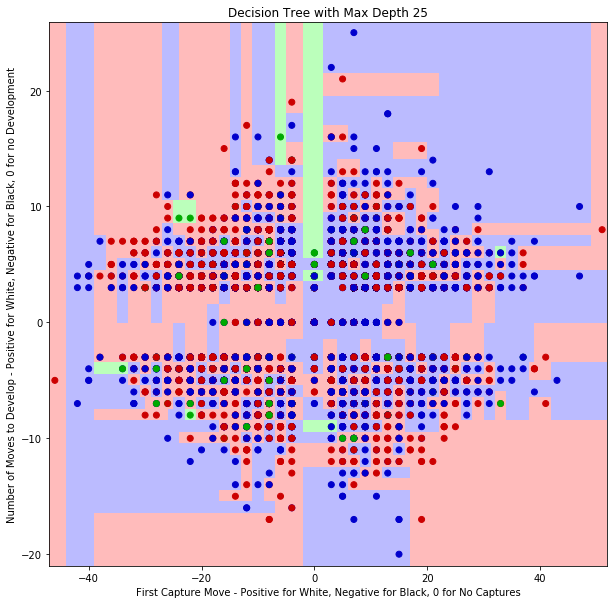

In [115]:
clf2 = tree.DecisionTreeClassifier(max_depth=25)
clf2.fit(combined[:,0:2], winner)
Z = clf2.predict(grid)
Z = Z.reshape(xx.shape) 
plt.figure(figsize=(10,10))
plt.pcolormesh(xx, yy, Z,  cmap=cmap_light)
plt.scatter(combined[:, 0], combined[:,1], c = winner, cmap = cmap_bold)
plt.title('Decision Tree with Max Depth 25')
plt.xlabel('First Capture Move - Positive for White, Negative for Black, 0 for No Captures')
plt.ylabel('Number of Moves to Develop - Positive for White, Negative for Black, 0 for no Development')
plt.show()